# Profile Categorization


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Target_Audience_Analysis/aaina_liker_profile_0.xlsx')

In [4]:
df

,Name,Title,Followers,Age(approx),Current/ Last designation,Years in Experience(approx),Current Workplace location,Current/Last Company Name,Recent Education,Certifications,Related Skills
0,Venkat,Attended Pado Tariq,285,20-25,Piyush Gupta,0,India,None,"Guruvaram, January",[None],"[['Piyush Gupta', 'Vaibhav Wadhwani', 'Ankit T..."
1,m karthick,Customer Service Team Lead at CEVA Logistics,836,25-30,Data Entry Specialist,7,"Chengalpattu, Tamil Nadu, India",Full-time,"Bachelor of Engineering - BE, Electrical, Elec...",[None],"[['Teamwork', 'Supply Chain Management', 'Logi..."
2,Pradeep Kumar Samanta,English faculty at Motion Education Pvt Ltd,44,20-25,English Teacher,4,"Kota, Rajasthan, India",Motion Education Pvt Ltd,"Master of Arts - MA, English Language and Lite...",[None],"[['Teaching', 'Knowledge Sharing', 'Interperso..."
3,shantanu t.road,Relationship Manager at Payneaby,27,None,Relationship Manager,None,"Kushinagar, Uttar Pradesh, India",Payneaby,None,[None],[['Sales']]
4,Deivasigamani V,Senior Executive @ Expo Freight Ltd.,24,None,Export Senior Executive,None,"Chennai, Tamil Nadu, India",Expo Freight Ltd.,None,[None],"[['Deloitte', 'Google']]"
...,...,...,...,...,...,...,...,...,...,...,...
608,Aman Rathore,Student,322,20-25,Subject Matter Expert,0,"Indore, Madhya Pradesh, India",Full-time,"Master of Business Administration - MBA, Human...",[None],"[['Microsoft Outlook', 'Team Leadership', 'Tea..."
609,GURMUKH SANDAL,Maintenance Technician at DNATA AVIATION SERVI...,699,50-55,Maintenance Technician,32,United Arab Emirates,DNATA AVIATION SERVICES LIMITED,"Diploma, Mechanical Engineering",[None],"[['Oxy-acetylene', 'Pipefitting', 'Metal Fabri..."
610,Alisha Soni,PRESTIGE INSTITUTE OF MANAGEMENT AND RESEARCH,31,20-25,Aakash Goswami,0,"Katni, India",None,Master of Business Administration - MBA,[None],"[['Accounting', 'English', 'Communication']]"
611,Akhilesh Kumar,Business Development Manager,"5,724",None,Area head sales manager,None,"Mira Bhayandar, Maharashtra, India",GLAXTON Appliances Pvt Ltd,None,[None],"[['Solution Selling', 'Marketing', 'New Busine..."


In [5]:
# Rename the column for conveinience

df = df.rename({'Current/ Last designation': 'Designation', 'Years in Experience(approx)': 'Experience', 'Current Workplace location': 'workplace_location', 'Current/Last Company Name': 'company_name', ' Recent Education': 'Education', 'Related Skills': 'skills'}, axis=1)

In [6]:
df.columns

Index(['Name', 'Title', 'Followers', 'Age(approx)', 'Designation',
       'Experience', 'workplace_location', 'company_name', 'Education',
       'Certifications', 'skills'],
      dtype='object')

In [7]:
# Creating a dictionary for Categorical Keywords in Designation

designation_category = {

    "Education": ["ASSOCIATE PROFESSOR", "ENGLISH TEACHER", "GRADUATE ENGINEERING TRAINEE", "SENIOR CORE COLLEGEE", "STUDENT", "Prof. Dr", 'IGCSE English Facilitator',
                  "STUDENT JOB", "TEACHER", "UNDERGRADUATE RESEARCH ASSISTANT", "Teaching & Materials Writing", "Management Student", "Bansal Classes Private Limited",
                  "CA Article Assistant", "Course Facilitator // Master Trainer", "Subject Matter Expert (Economics)", "Senior Faculty", "Faculty",],

    "Media": ["MAGICIAN & VENTRILOQUIST", "NEWS ANCHOR", "NEWS EDITOR", "Media Planner - Buyer Pan India", 'Head - PR & Marketing Operations', "Multimedia Journalist",],


    "Digital Marketing": ["DIGITAL MARKETING EXECUTIVE", "DIGITAL MARKETING SPECIALIST", "SENIOR DIGITAL MARKETING EXECUTIVE", "Productivity Strategist",
                          "Digital Marketing Expert and ERP Implementor", "SOCIAL MEDIA MARKETING MANAGER", "CONTENT CREATOR", "freelancer",
                          "CONTENT WRITER","CONTENT MANAGER", "Personal Branding Strategist", "Freelancing Coach", "Freelance Legal Content & Ghostwriter",
                          "Freelance Holistic Health Writer & LinkedIn Personal Branding Coach", "Freelance Writer",  "Social Media Manager", "Social Media Strategist",
                          "As a Digital Marketer & Ecommerce for Local Businesses Helping Local Businesses Grow Sales |", "Professional Freelancer",  "|| Digital entrepreneur ||",
                          "LinkedIn Personal Branding Strategist and Content Marketer", 'Digital Marketing Consultant', 'Content Strategist', 'Freelance content writer, Content Marketing',
                          "Head of Content", "Web Content Writer", "Content Writer", "Brand Ambassador", "LinkedIn GhostWriter",],


    "Sales & Marketing": ["ACCOUNT MANAGER", "ADVERTISING SPECIALIST", "ASSISTANT DISTRICT MANAGER", "ASSISTANT MANAGER", "ASSISTANT SALES MANAGER",
                          "ASSOCIATE CONSULTANT", "ASSOCIATE SALES MANAGER", "CAMPUS AMBASSADOR", "MANAGER OF SALES", "Logistics Coordinator",
                          "EXECUTIVE FINANCE AND ACCOUNTS","EXPORT SENIOR EXECUTIVE","HEAD OF BUSINESS DEVELOPMENT IHUB ANUBHUTI-IIITD FOUNDATION",
                          "INTERNATIONAL MARKETING AND PRODUCT SOURCING SPECIALIST", 'MARKETING COORDINATOR AND CONTENT CREATOR', 'RETAIL', 'Procurement and hse officer',
                          "MARKETING EXECUTIVE","MARKETING GROWTH REPRESENTATIVE", "REAL ESTATE AGENT","Marketing Manager", "Customer Relationship Management Manager",
                          "Senior Customer Success Manager", "Group Sales Leader", "Affiliate Marketer", "Inside Sales", "Sales Development Representative",
                          "RELATIONSHIP MANAGER", "RETAIL PARTNER","SALES AND MARKETING DEPARTMENT - AGENTE DI COMMERCIO","SALES AND MARKETING SPECIALIST",
                          "SALES MANAGER","SALES OFFICER","SALES OFFICER(BRANCH INCHARGE)", "SENIOR SALES CONSULTANT", "Head Of Sales Marketing",
                          "SPECIAL EVENT MANAGER","TERRITORY OFFICER","UNIT SALES MANAGER", "Senior Accountant",
                          "Presales Manager", 'Realtor', 'Marketing Strategy Consultant', 'Business Consultant - All-Rounder B2B', 'Area manager in moral pharma jabalpur'],


    "Business and Management": ["Associate Executive", "Associate", "Sr. Executive", "Senior Associate", "Managment trainee", "Business Development Officer",
                                "Front Office Manager", "Business Development and Client Relationship Manager", "CO-OWNER",  "Zonal service specialist (Anesthesia) - North India", "Commercial",
                                "EXECUTIVE", "EXECUTIVE ASSISTANT", "GUEST SERVICES ASSOCIATE", "OPERATOR", "REPRESENTATIVE ADVISOR-1", 'Admin officer & GH incharge',
                                "Company Owner", "Senior Consultant", "Zonal operations officer", "C E O", "BUSINESS DEVELOPMENT SPECIALIST",  "Business Influencer",
                                "BUSINESS DEVELOPMENT ASSOCIATE", "BUSINESS DEVELOPMENT EXECUTIVE", "BUSINESS DEVELOPMENT MANAGER", "Creative Controller (Copy)",
                                "Equity Derivatives Dealer", "Deputy Manager", "Entrepreneur", "Manager", "Head of Digital Marketing", "Director Business Strategy",
                                "Chief Marketing Officer", "Senior Administration Officer",],



    "Management & Leadership": ['ACOUNTS MANAGER', 'ASST VICE PRESIDENT (TRADE)', 'AXIS BANK', 'BUSINESS OWNER', 'Deputy Chief Operating Officer',
                                'CEO', 'CEO & MANAGING DIRECTOR', 'CHIEF EDITOR', 'CHIEF EXECUTIVE OFFICER', 'CO-FOUNDER', 'CO-FOUNDER & CMO', 'Chairman',
                                'DELIVERY LEAD', 'DEPARTMENT MANAGER', 'DIRECTOR OF CORPORATE TOURISM CO.', 'ENTREPRENEURSHIP', 'FOUNDER', 'FOUNDER & MD',
                                "FOUNDER'S OFFICE INTERN", 'GENERAL MANAGER - TENDER & ESTIMATION', 'GENERAL MANAGER ADMINISTRATION AND PLANT HEAD',
                                'GROUP IT HEAD', 'INFORMATION TECHNOLOGY MANAGER', 'JR.MANAGER', 'MANAGEMENT TRAINEE', 'MANAGER OPERATION', 'MANAGING DIRECTOR',
                                'MERCHANDISE MANAGER', 'OPERATIONS MANAGER', 'OWNER', 'PRINCIPAL', 'P.M.', 'Sr.Manager production (GA/GI)', 'Sr.Manager-PrePress',
                                'PRINCIPAL OWNER', 'PROJECT MANAGER', 'SENIOR ACCOUNT OFFICER', 'SENIOR HUMAN RESOURCES MANAGER', 'SENIOR MANAGER',
                                'SENIOR MANAGER - AMERICAS SOLUTION DESIGN TEAM', 'SENIOR MANAGER ENTERPRISE SALES', 'SENIOR PROJECT MANAGER', 'Marketing manger',
                                'SENIOR RECRUITMENT MANAGER', 'SENIOR RELATIONSHIP MANAGER', 'SENIOR TEAM LEAD', 'SR OFFICER', 'STATE PROGRAM MANAGER',
                                'TEAM LEAD', 'TEAM LEADER', 'Assistant Branch Manager', 'Branch Sales Manager', 'Senior Sales Manager',
                                'Production Manager', 'Country Manager, Bahrain and Saudi Arabia', "Asst Manager Collab",],


    "Creative & Design": ['CHIEF INFOGRAPHICS DESIGNER AT THE LEVEL OF ASSISTANT INFO GRAPHICS EDITOR', 'CONTENT DEVELOPMENT SPECIALIST',
                          'FOOTWEAR DESIGNER', 'GRAPHIC DESIGNER', 'GRAPHICS DESIGNER | 2D ANIMATOR', "WEB DESIGNER", "History blogs writing",
                          'TEXTURE ARTIST', 'Graphics Designer', 'Freelance Video Editor', 'User Interface Designer', 'Copywriter',
                          'Video Editor', 'senior UI/UX Designer', 'Food Writer', 'VFX Production Coordinator',],



    "Technical & Engineering": ["Civil Engineer", "SR QA QC INSPECTOR", "Sales Engineer", "Senior Map Animator", "Senior Field Engineer", "Maintenance Supervisor", "Manufacturing Engineer",
                                "Cargo Agent", "Sr Design Engineer", "Maintenance Technician", "Telecommunications Engineer", "PGTE", "Design Engineer", "SR. ENGINEER-MECHANICAL", "Management Information Systems Officer",
                                "Quantity Surveyor", "Electric Engineer", "Land Surveyor", "Mechanical Engineer", "Mechanical Foreman", "Trainee Engineer", "Section Engineer (Track)", "Senior quality office",
                                "Planning Engineer", "Instrument Engineer", "Iti fitter", "Deputy Manager 2D CAD", "Heating Ventilation Air Conditioning Technical - FIFA WORLD CUP 2022",
                                "Electrical Technician", "Electrical Manager", "Engineer", "Area legal manager", "Quality Control Analyst", "Precision Strip processing Equipments & SPM Machinetools Professional",
                                "Senior Automation Control Engineer", "professional 1 system engineers", "Production operative", "BIM Engineer", "Operation Engineer", "Construction Worker",
                                "Quality Control Inspector", "Junior Consultant ERP", "Research Analyst IV", "Research Consultant", "Quality Managment", "Electrician", "Laboratory Technologist", "Scientific Researcher",],



    "Information Technology": ['ASSISTANT SYSTEM ENGINEER', 'ASSOCIATE APPLICATION DELIVERY', 'ASSOCIATE CLOUD DEVELOPER', 'ASSOCIATE PROFESSIONAL SOFTWARE ENGINEER', 'SERVICE DESK ANALYST', "Android Developer",
                               'DATA ANALYST', 'DATA ENGINEER LL', 'DESKTOP SUPPORT ENGINEER', 'INFORMATION TECHNOLOGY ANALYST', 'SOFTWARE TEST ENGINEER', 'SOFTWARE TESTING ENGINEER', "Full Stack Developer",
                               'INFORMATION TECHNOLOGY OPERATIONS TEAM LEAD', 'INFORMATION TECHNOLOGY TECHNICAL RECRUITER', 'INFOSEC ANALYST', 'LINUX SYSTEM ADMINISTRATOR', 'Junior Unity Developer', 'Member IEEE',
                               'PROGRAMMER ANALYST TRAINEE', 'SAP AND MIS OPERATOR', 'SENIOR BUSINESS ANALYST', 'SENIOR WIRE DRAWING OPERATOR', 'TECHNICAL RECRUITER', "Senior Test Lead", "Collection analyst", "Senior Application Support Analyst",
                               'SOFTWARE DEVELOPMENT ENGINEER', 'SOFTWARE ENGINEER', 'SOFTWARE MANAGER', 'SOFTWARE QA TESTER', "Research And Development Associate", "Work experience hardware and software or networking support at central bank of India",
                               'SR. ORACLE FUNCTIONAL CONSULTANT', 'SR.SOFTWARE DEVELOPER', 'SYSTEM ADMINISTRATOR', 'SYSTEM ENGINEER', 'SYSTEM TEST ENGINEER', 'Full Stack Website Developer | Relational Database Management System (RDBMS)',
                               'TEST ANALYST', 'TESTING ENGINEER', 'WEB DEVELOPER', 'WEB DEVELOPMENT & DESIGNING', 'Web Designer', 'Associate Software Engineer', 'PHP Developer', 'Sr. Game Developer',
                                "QA&PD", "SEO Analyst", "IT senior sales executive", 'I.C.T Manager', 'IT Manager', 'SEO Consultant', 'Senior Advisor (BI Developer)', 'IT Analyst',
                                'Dynamics 365 Technical Consultant | Power Apps', 'Laravel Developer', 'Python Developer', 'User Experience Designer', 'Senior Closer', 'Software Developer',],



    "Finance & Accounting": ['ACCOUNT EXECUTIVE', 'ACCOUNTING INTERN', 'ACCOUNTS AND AUDIT', 'ASSISTANT CREDIT MANAGER', 'CFO',
                             'COMPLIANCE INTERN', 'CREDIT ANALYST', 'FINANCE EXECUTIVE', 'FINANCE INTERN', 'FINANCE LOGISTIC HR',
                             'MODERN TRADE ACCOUNT SPECIALIST', 'Faysal Bank Limited', 'Accountant', 'Manager Accounts', 'Regional Accountant',
                             'Accounts Officer', 'Financial Controller', 'Equity Trader'],



    "Human Resources": ['HR MANAGER', 'HR MANAGER AND UI UX DESIGNER (FIGMA)', 'HR RECRUITER', 'HUMAN RESOURCES CONSULTANT',
                        'HUMAN RESOURCES INTERN', 'HUMAN RESOURCES SPECIALIST', 'RECRUITER', 'RECRUITMENT SPECIALIST',
                        'TALENT ACQUISITION EXECUTIVE', 'Administrative Manager', 'Human Resources Business Partner',
                        'HR Advisory, Talent Acquisition Strategy & Operations', 'Human Resources Manager'],


    "Technical Support & Service": ['Assistant System Engineer', 'Technical Service Engineer', 'Technical Consultant', 'Stewardship Coordinator',],


    "Customer Service": ["Customer Service Associate", 'Service Desk Lead', 'Service Coordinator', 'Guest Service Representative', 'Client Service Representative', 'Customer Service Advisor'],


    "Healthcare & Medical": ["Paramedic di pt. Globalindo agung lestari", "General Dental Practitioner", "Doctor", 'Conditioning Expert', "Clinical Lead - Clincal care , Training& Development",
                             "Medical Practitioner", "Health and well-being", "Chief Clinical Cardiac Perfusionist", "Medical Officer", "Senior Search Engine Analyst at Glamyo Health",],


    "Other Professional Roles": ["Specialist", "Quality Assurance", "U.S I.T Recruiter", "Admissions Officer", "Cooking Instructor", "Trainee- US recruitment",],



    "Legal": ["Legal Associate", "Legal Officer", "Legal Advocate",],


    "Miscellaneous": ["LOAN SIGNING AGENT", "FRENCH LANGUAGE EXPERT", "FULL-TIME PARENTING", "HINDUSTAN ZINC LIMITED", "JOB DONE HERE ACADEMIC SOLUTIONS", "Driver",
                      "LIGHT HOUSE MEMBER", "karate player", "Corporate business Development intern", "Internship Trainee", "Assistant Store Manager", "Intern",
                      "FACTORY WORKER", "HOUSEKEEPER", "HOUSEKEEPING ATTENDANT", "KarDive", "Claims Analyst", "Estimator", "Government Contractor", "Seminar librarian",
                      "3D MAX DESIGN (MY NUMBER - 9987995792)PGTE", "TCS YEP", "Fulton financial", 'Work from home', "Head of interior design (19 Years of Experience)",
                      "Probationary Officer", "Sr Incipient Fire fighters AGT", "Coordenador Comercial Soluções Financeiras", "Enviro-social Safeguard with HSE Expert",
                      "Arabian Travels", "OKAYA ELECTRIC VEHICLES PVT LTD", "Assistant", "Supervisor", "AdzGuru", "Industrial Training", "Country Head", "Career transition",
                      "Health Safety Environment", "Shree Hari Construction", "RD, Ruba Digital PVT. LTD.", "Demonstrator", "Project Coordinator & Planning", "Lead Carpenter",
                      "boxing coach", "Data Entry Clerk", "Self Employed", "Duct man",],



    "Not Job Titles": ['AJITAAKSH VENTURES PVT LTD', 'AJITAAKSH VENTURES PVT LTDBANSAL CLASSES PRIVATE LIMITED',
                       'ATTENDANT (BPS-16) WAPDA, NPGCL GENCO-III, GTPS, NISHATABAD, FAISALABAD, PUNJAB, PAKISTAN', 'BESIX',
                       'FAINGER LESER VALVES PVT LTD', 'G4S', 'HBL MICRO FINCE BANK', 'NSTI BENGALORE', 'TREVOR SEPULVIDA',
                       'ZION ENGINEERING WORKS', "Fresher", "Unemployed"]

}



In [8]:
# Check for duplicate values across all the keys
all_values = [value for values in designation_category.values() for value in values]
duplicate_values = {value for value in all_values if all_values.count(value) > 1}

# Check for duplicate values within the same key
duplicate_values_within_keys = {}
for key, values in designation_category.items():
    duplicate_values_within_key = {value for value in values if values.count(value) > 1}
    if duplicate_values_within_key:
        duplicate_values_within_keys[key] = duplicate_values_within_key


print("Duplicate values across keys:", duplicate_values)
print("Duplicate values within keys:")
for key, values in duplicate_values_within_keys.items():
    print(f"Key: {key}, Duplicate values: {values}")

Duplicate values across keys: set()
Duplicate values within keys:


In [9]:
! pip install fuzzywuzzy

In [11]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [12]:

# This function will assign the category by matching the keywords

def assign_category_from_keywords(keywords):
    category_scores = {}  # Dictionary to store category scores

    for keyword in keywords:
        for category, category_keywords in designation_category.items():

            # Convert both the keywords (in dictionary and Designation column) to lowercase for case insesitive comparision
            keyword_lower = keyword.lower()
            category_keywords_lower = [kw.lower() for kw in category_keywords]

            # Calculate a match score using fuzzy string matching (adjust threshold as needed)
            if category_keywords_lower:
                match_score = max(fuzz.partial_ratio(keyword_lower, kw) for kw in category_keywords_lower)
            else:
                match_score = 0

            # Update the category score
            category_scores[category] = category_scores.get(category, 0) + match_score

    # Find the category with the highest score
    assigned_category = max(category_scores, key=category_scores.get)

    # If the highest score is below a certain threshold, assign 'Other'
    if category_scores[assigned_category] < MATCHING_THRESHOLD:
        assigned_category = 'Other'

    return assigned_category

# Set a matching threshold below which 'Other' is assigned
MATCHING_THRESHOLD = 100  # Adjust as needed based on your data

# Apply the function to create the Category column
df['Category'] = df['Designation'].apply(lambda d: assign_category_from_keywords([d]))


In [13]:
df

,Name,Title,Followers,Age(approx),Designation,Experience,workplace_location,company_name,Education,Certifications,skills,Category
0,Venkat,Attended Pado Tariq,285,20-25,Piyush Gupta,0,India,None,"Guruvaram, January",[None],"[['Piyush Gupta', 'Vaibhav Wadhwani', 'Ankit T...",Other
1,m karthick,Customer Service Team Lead at CEVA Logistics,836,25-30,Data Entry Specialist,7,"Chengalpattu, Tamil Nadu, India",Full-time,"Bachelor of Engineering - BE, Electrical, Elec...",[None],"[['Teamwork', 'Supply Chain Management', 'Logi...",Other Professional Roles
2,Pradeep Kumar Samanta,English faculty at Motion Education Pvt Ltd,44,20-25,English Teacher,4,"Kota, Rajasthan, India",Motion Education Pvt Ltd,"Master of Arts - MA, English Language and Lite...",[None],"[['Teaching', 'Knowledge Sharing', 'Interperso...",Education
3,shantanu t.road,Relationship Manager at Payneaby,27,None,Relationship Manager,None,"Kushinagar, Uttar Pradesh, India",Payneaby,None,[None],[['Sales']],Sales & Marketing
4,Deivasigamani V,Senior Executive @ Expo Freight Ltd.,24,None,Export Senior Executive,None,"Chennai, Tamil Nadu, India",Expo Freight Ltd.,None,[None],"[['Deloitte', 'Google']]",Sales & Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Aman Rathore,Student,322,20-25,Subject Matter Expert,0,"Indore, Madhya Pradesh, India",Full-time,"Master of Business Administration - MBA, Human...",[None],"[['Microsoft Outlook', 'Team Leadership', 'Tea...",Education
609,GURMUKH SANDAL,Maintenance Technician at DNATA AVIATION SERVI...,699,50-55,Maintenance Technician,32,United Arab Emirates,DNATA AVIATION SERVICES LIMITED,"Diploma, Mechanical Engineering",[None],"[['Oxy-acetylene', 'Pipefitting', 'Metal Fabri...",Technical & Engineering
610,Alisha Soni,PRESTIGE INSTITUTE OF MANAGEMENT AND RESEARCH,31,20-25,Aakash Goswami,0,"Katni, India",None,Master of Business Administration - MBA,[None],"[['Accounting', 'English', 'Communication']]",Other
611,Akhilesh Kumar,Business Development Manager,"5,724",None,Area head sales manager,None,"Mira Bhayandar, Maharashtra, India",GLAXTON Appliances Pvt Ltd,None,[None],"[['Solution Selling', 'Marketing', 'New Busine...",Sales & Marketing


In [14]:
df['Category'].value_counts()

Other                       130
Business and Management     124
Technical & Engineering      74
Sales & Marketing            62
Management & Leadership      43
Miscellaneous                37
Information Technology       35
Education                    29
Digital Marketing            22
Creative & Design            11
Other Professional Roles     10
Not Job Titles                8
Finance & Accounting          8
Human Resources               8
Healthcare & Medical          6
Media                         3
Legal                         2
Customer Service              1
Name: Category, dtype: int64

In [15]:
other_df = df[df['Category']  == 'Other']

In [16]:
for index, row in other_df.iterrows():
  print(f"{row['Designation']} \n {'-'*30} \n {row['Title']} \n {'=' * 60} \n")

Piyush Gupta 
 ------------------------------ 
 Attended Pado Tariq 

Piyush Gupta 
 ------------------------------ 
 -- 

Swopnonil Banerjee 
 ------------------------------ 
 B.COM Graduate || Advance Excel || Accounting Knowledge || Microsoft Office ( Word, Power Point) || 

Riva Pandey 
 ------------------------------ 
 Student at The Institute of Chartered Accountants of India 

Igli Beti 
 ------------------------------ 
 -- 

Piyush Gupta 
 ------------------------------ 
 BCA student 

Komal Gupta 
 ------------------------------ 
 CA intermediate | Self Enthusiastic | learner| bcom(H)| selflover 

Piyush Gupta 
 ------------------------------ 
 Dr. Br.Ambedkar law college 

Piyush Gupta 
 ------------------------------ 
 Student at Indira Gandhi National Open University 

Shivanand Yadav 
 ------------------------------ 
 Student at Lovely Professional University 

Shivanand Yadav 
 ------------------------------ 
 Student at Sahand University of Technology 

Shivanand Yadav 


In [17]:
# Dictionary for categorization on title basis

title_category = {
    "Digital Marketing": ['Ghostwriter', 'email marketing', 'Content Writer', 'Lead Generation', 'Freelance Content Writers', 'Content Writer', 'Freelancer',
                          'Growth Hacker', 'Lead Generation',],
    "Business and Management": ['Operations Executive-',],
        "Creative & Design": [],
    "Media": ['Media Planning- Buying'],
    "Education" : ['Student', 'Attended', 'collage', 'college', 'University', 'unvircity', 'Pursuing', 'Career counselor', 'Fellow', 'intern', 'Graduate',],
    "Information Technology": ["computer Science Engineer", "Power Bi", "SQL", "EXCEL", "MERN stack", "AWS ", "Java", "SaaS", "Frontend Developer",
                               "Figma", "Dart", "HTML", "Data  Scientist", "Network Engineer",],
    "Management & Leadership": ['Operations Executive', 'Owner', 'WARE HOUSE OFFICER', 'Founder', 'GM', 'Training Manager',],
    "Technical & Engineering": ['Mechanical Engineer', 'SERVICES BOILER (Branch Office)', 'Technicien Agricole', '--AUTO DENTER', 'Electrical maintenance engineer',],
    "Sales & Marketing": ['Marketing', 'Sales',],
    "Finance & Accounting": ["CA", "(MBA)"],
    "Human Resources": [],
    "Technical Support & Service": [],
    "Customer Service": [],
    "Healthcare & Medical": ['Ayurvedic Doctor',],
    "Other Professional Roles": [],
    "Legal": [],
    "Miscellaneous": ["B.COM Graduate", "bussinessman at three star automobiles",],
    "Not Job Titles": ["Goa Verna industrial  pvt LTD company", "Boohoo at boohooMAN.com"],

}

In [18]:
# Function to assign a category based on title
def assign_category_from_keywords(keywords):
    category_scores = {}  # Dictionary to store category scores

    for keyword in keywords:
        for category, category_keywords in title_category.items():
            # Convert both the keywords (in dictionary and Designation column) to lowercase for case insesitive comparision
            keyword_lower = keyword.lower()
            category_keywords_lower = [kw.lower() for kw in category_keywords]

            # Calculate a match score using fuzzy string matching (adjust threshold as needed)
            if category_keywords_lower:
                match_score = max(fuzz.partial_ratio(keyword_lower, kw) for kw in category_keywords_lower)
            else:
                match_score = 0

            # Update the category score
            category_scores[category] = category_scores.get(category, 0) + match_score

    # Find the category with the highest score
    assigned_category = max(category_scores, key=category_scores.get)

    # If the highest score is below a certain threshold, assign 'Other'
    if category_scores[assigned_category] < MATCHING_THRESHOLD:
        assigned_category = 'Other'

    return assigned_category

# Set a matching threshold below which 'Other' is assigned
MATCHING_THRESHOLD = 100  # Adjust as needed based on your data

# Apply the function to create the Category column
other_df['Category'] = other_df['Title'].apply(lambda title: assign_category_from_keywords([title]))


<ipython-input-18-6e36a317ff4f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['Category'] = other_df['Title'].apply(lambda title: assign_category_from_keywords([title]))


In [19]:
other_df['Category'].value_counts()

Education                  54
Technical & Engineering    25
Other                      19
Digital Marketing           8
Information Technology      7
Finance & Accounting        3
Miscellaneous               3
Sales & Marketing           3
Management & Leadership     3
Not Job Titles              2
Media                       1
Business and Management     1
Healthcare & Medical        1
Name: Category, dtype: int64

In [20]:
skill_df = other_df[other_df['Category'] == 'Other']

In [21]:
for index, row in skill_df.iterrows():
  print(f"Title: {row['Title']}\n Designation: {row['Designation']}\n Skills: {row['skills']} \n {'=' * 60} \n")

Title: --m.d  kamlesh steel bangalore
 Designation: Parth Sharma
 Skills: [['Parth Sharma', 'Diksha Sharma', 'Shibaditya Pandit', 'Vishnu E r', 'Sahil Solanki']] 

Title: Каждый человек, должен находиться на своей позиции, чтобы получать Хай комфорт от жизни!))
 Designation: Parth Sharma
 Skills: [['Parth Sharma', 'Diksha Sharma', 'Shibaditya Pandit', 'Vishnu E r', 'Sahil Solanki']] 

Title: A solo traveller, and Aspirant....Looking for .Net 3.5 development Profile
 Designation: Jenifer Princy
 Skills: [['ADO.Net 3.5', 'Online Advertising', 'Artificial Intelligence (AI)']] 

Title: 3d max design  (my number -9987995792) at FORM mumbai events design work stage
 Designation: 3d max design  (my number -9987995792)
 Skills: [['3D', 'Management', 'Design']] 

Title: Working
 Designation: Shachi Mittal
 Skills: [['Shachi Mittal', 'Kritika kumari Gupta', 'Darshana Ojha', 'Sahil Singh', 'Ranjot Singh']] 

Title: Aspiring Occupational Health and Safety Professional with NEBOSH IGC & IOSH Certif

In [22]:
# Creating a dictionary for skill wise categorization

skills_category = {


"Sales & Marketing": ['Supply Chain Management', 'Logistics Management', 'Sales', 'Account Management', 'Financial Analysis', 'Accounting', 'Marketing',],
"Digital Marketing": ['Online Marketing', 'Creative Content Creation', 'Advertising', 'Marketing Communications', 'Integrated Marketing',
                      'Online Advertising',],
"Information Technology": ['Data Analysis',  'Java', 'JavaScript',  'Cyber Security Incidents', 'C (Programming Language)',  'Python (Programming Language)',  'Data Science',
                           'Cybersecurity', 'Data Science', 'PhpMyAdmin', 'PHP Frameworks',  'Responsive Web Design', 'Debugging', 'Artificial Intelligence (AI)',
                           'Networking', 'Azure DevOps Server',  'Web Development', 'HTML',],
"Technical & Engineering": ['Surface Mining',],

"Education": ['Teaching',],
"Creative & Designing": ['Video Editing', 'Sound Design', 'Design',],
"Management & Leadership": ['Senior Executive',  'Account Management', 'Financial Accounting', 'Management', ],
"Business and Management": ['Task Management',],
    "Humam Resource": ['Recruiting'],
"Healthcare": ['Counseling Psychology', 'Pharmacovigilance'],
"Other Professional Roles": ['Task Management', 'Workplace Safety', 'Risk Management'],
"Miscelleneous": ['Driver',  'Strategical trading', ]
}

In [23]:
# Function to assign a category based on skills
def assign_category_from_keywords(keywords):
    category_scores = {}  # Dictionary to store category scores

    for keyword in keywords:
        for category, category_keywords in skills_category.items():

            # Convert both the keywords (in dictionary and Designation column) to lowercase for case insesitive comparision
            keyword_lower = keyword.lower()
            category_keywords_lower = [kw.lower() for kw in category_keywords]

            # Calculate a match score using fuzzy string matching (adjust threshold as needed)
            if category_keywords_lower:
                match_score = max(fuzz.partial_ratio(keyword_lower, kw) for kw in category_keywords_lower)
            else:
                match_score = 0

            # Update the category score
            category_scores[category] = category_scores.get(category, 0) + match_score

    # Find the category with the highest score
    assigned_category = max(category_scores, key=category_scores.get)

    # If the highest score is below a certain threshold, assign 'Other'
    if category_scores[assigned_category] < MATCHING_THRESHOLD:
        assigned_category = 'Other'

    return assigned_category

# Set a matching threshold below which 'Other' is assigned
MATCHING_THRESHOLD = 100  # Adjust as needed based on your data

# Apply the function to create the Category column
skill_df['Category'] = skill_df['skills'].apply(lambda skill: assign_category_from_keywords([skill]))


<ipython-input-23-00f0b515b92d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_df['Category'] = skill_df['skills'].apply(lambda skill: assign_category_from_keywords([skill]))


In [24]:
skill_df['Category'].value_counts()

Other                      6
Sales & Marketing          5
Creative & Designing       3
Information Technology     2
Digital Marketing          1
Management & Leadership    1
Technical & Engineering    1
Name: Category, dtype: int64

In [25]:
print(skill_df[skill_df['Category'] == 'Other'].index)
print(other_df.index)

Int64Index([242, 246, 283, 426, 582, 601], dtype='int64')
Int64Index([  0,   5,   6,   8,   9,  13,  15,  18,  35,  66,
            ...
            589, 592, 594, 597, 599, 600, 601, 604, 607, 610],
           dtype='int64', length=130)


In [26]:
"""This cell will assign the categories of smaller dataframe to those rows of bigger dataframe where 'Category is Other'"""

# getting the index of other_df and assigning them to skill_df as indexes
skill_df.index = other_df[other_df['Category'] == 'Other'].index

# Extract 'Category' column from skill_df
updated_categories = skill_df['Category']

# Update 'Category' column in the other_df
other_df.loc[skill_df.index, 'Category'] = updated_categories


<ipython-input-26-845b9840ff9e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df.loc[skill_df.index, 'Category'] = updated_categories


In [27]:
other_df['Category'].value_counts()

Education                  54
Technical & Engineering    26
Information Technology      9
Digital Marketing           9
Sales & Marketing           8
Other                       6
Management & Leadership     4
Finance & Accounting        3
Miscellaneous               3
Creative & Designing        3
Not Job Titles              2
Media                       1
Business and Management     1
Healthcare & Medical        1
Name: Category, dtype: int64

In [28]:
"""This cell will assign the categories of smaller dataframe to those rows of bigger dataframe where 'Category is Other'"""

# assigning the indexes of those rows of df where category is other to other_df as indexes
other_df.index = df[df['Category'] == 'Other'].index

# Extract 'Category' column from other_df
updated_categories = other_df['Category']

# Update 'Category' column in the main df
df.loc[other_df.index, 'Category'] = updated_categories


In [29]:
df['Category'].value_counts()

Business and Management     125
Technical & Engineering     100
Education                    83
Sales & Marketing            70
Management & Leadership      47
Information Technology       44
Miscellaneous                40
Digital Marketing            31
Creative & Design            11
Finance & Accounting         11
Other Professional Roles     10
Not Job Titles               10
Human Resources               8
Healthcare & Medical          7
Other                         6
Media                         4
Creative & Designing          3
Legal                         2
Customer Service              1
Name: Category, dtype: int64

# Visualization


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

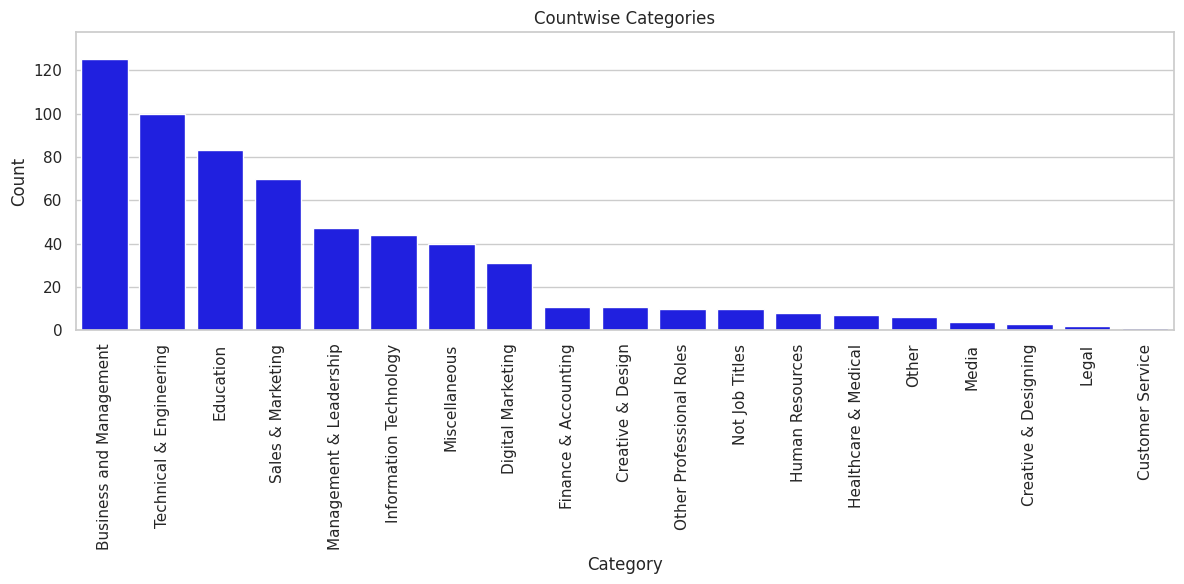

In [91]:
grouped = df.groupby('Category').agg('count').reset_index()

# Rename the column you want to use for the count as 'count'
grouped.rename(columns={'Designation': 'count'}, inplace=True)

# Sort the grouped DataFrame by the 'count' column in descending order
grouped = grouped.sort_values(by='count', ascending=False)


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(12, 6))

# Create a bar plot for the count
ax = sns.barplot(x='Category', y='count', data=grouped, color='blue', label='Count')
# Set labels and title
plt.ylabel('Count')
plt.xlabel('Category')
plt.title('Countwise Categories')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set y-axis limits for better visibility
ax.set(ylim=(0, grouped['count'].max() * 1.1))

plt.tight_layout()
plt.show()



In [32]:
# Convert the 'Experience' column to numeric, replacing any non-numeric values with NaN
df['Experience'] = pd.to_numeric(df['Experience'], errors='coerce')

In [33]:
df['Experience'].nlargest(n=10)

42     38.0
426    38.0
235    37.0
387    37.0
469    37.0
19     36.0
378    36.0
174    34.0
416    34.0
17     33.0
Name: Experience, dtype: float64

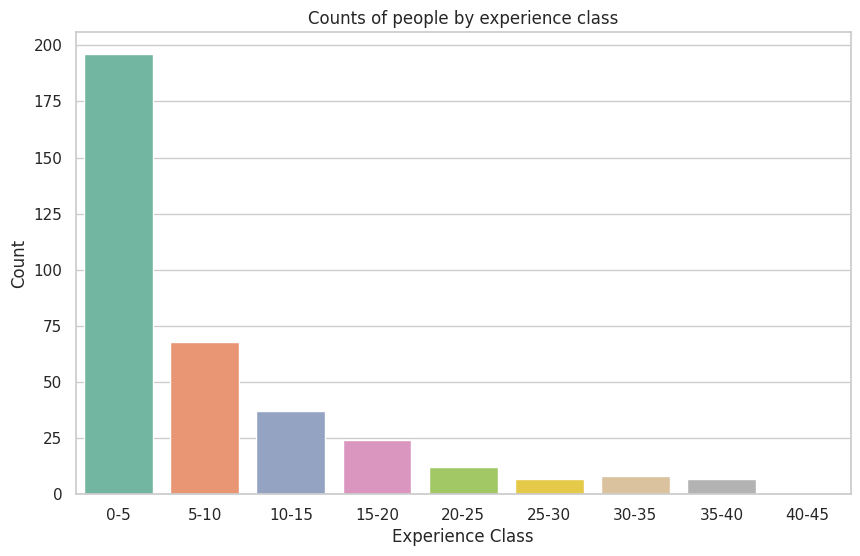

In [34]:
# Define the bin edges for the experience classes
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Create a new column 'Experience Class' based on the bin edges
df['Experience Class'] = pd.cut(df['Experience'], bins=bin_edges, labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45'])

# Define the desired order for the x-axis
desired_order = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45']

# Create a countplot with the desired order
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Experience Class', order=desired_order, palette='Set2')

# Add title and labels
plt.title('Counts of people by experience class')
plt.xlabel('Experience Class')
plt.ylabel('Count')

plt.show()


In [39]:
# Create a list to store the extracted country names, states, and cities
country = []
state = []
city= []

# Iterate through each location and extract the country name
for location in df['workplace_location']:
    parts = location.split(', ')


    if len(parts) > 2:
        city.append(parts[0])
        state.append(parts[1])
        country.append(parts[-1])
    else:
        if (len(parts)>1):
          city.append(parts[0])
          state.append("None")
          country.append(parts[-1])
        else:
          country.append(parts[0])
          state.append("None")
          city.append("None")


df['Country'] = country
df['State'] = state
df['City'] = city

[Text(0.5, 1.0, 'Top 8 Cities in this dataframe who liked this theme')]

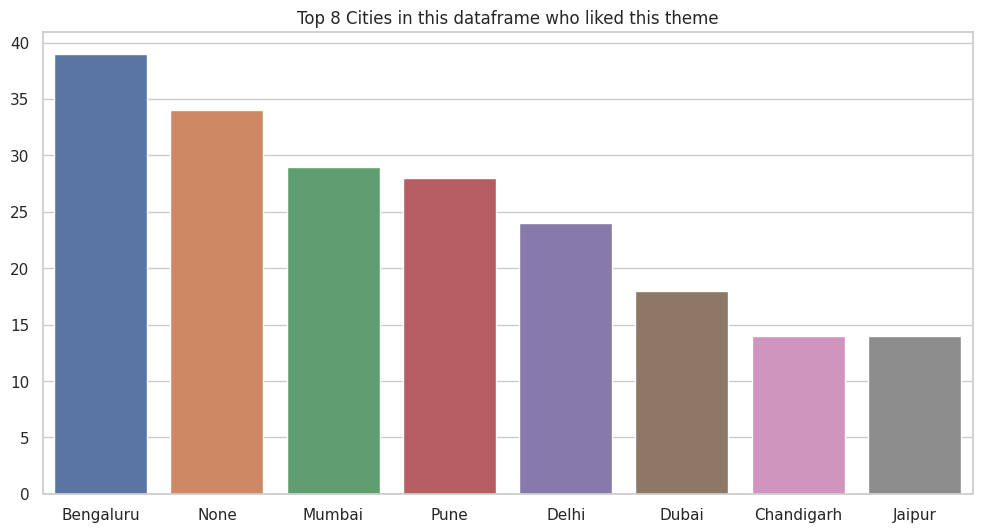

In [50]:
# we have to see the state wise data. choose top 5 states
# From which top 5 cities are most of the people belongs to?

cities = df['City'].value_counts().sort_values(ascending=False)[:8]

plt.figure(figsize=(12, 6))
sns.barplot(x = cities.index, y = cities.values).set(title="Top 8 Cities in this dataframe who liked this theme")
# sns.countplot(x ='City', data=df)

In [38]:
df.columns()

Index(['Name', 'Title', 'Followers', 'Age(approx)', 'Designation',
       'Experience', 'workplace_location', 'company_name', 'Education',
       'Certifications', 'skills', 'Category', 'Experience Class'],
      dtype='object')

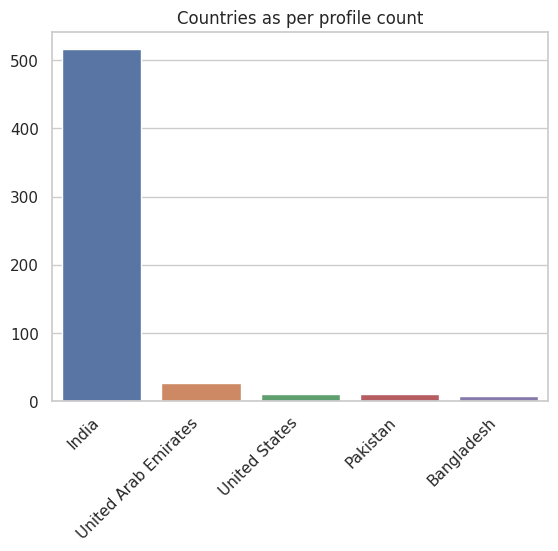

In [54]:
countries = df.Country.value_counts()[:5]
sns.barplot(x = countries.index, y = countries.values).set(title="Countries as per profile count")
# plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha="right")
plt.show()

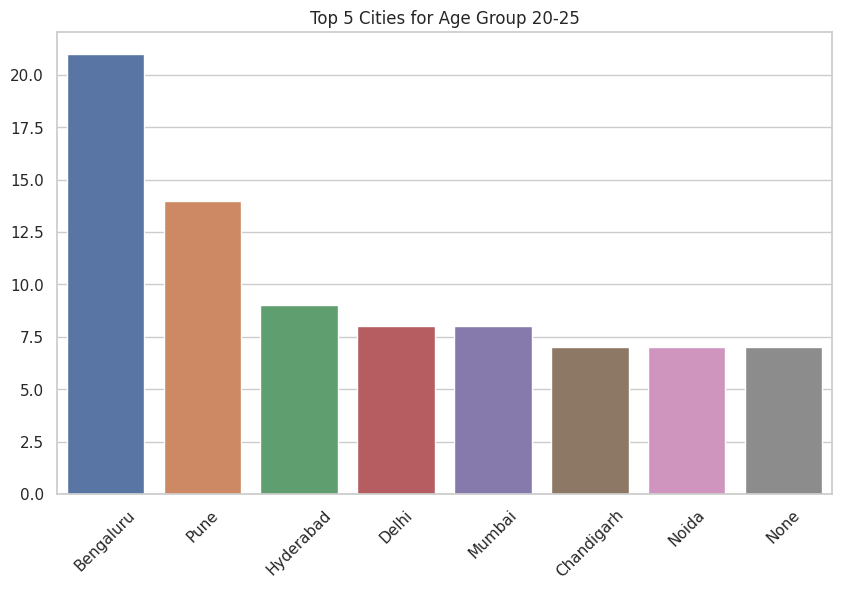

In [89]:
# People from the top 5 cities in the 20-25 age group
age_group = '20-25'
top_cities = df[df['Age(approx)'] == age_group]['City'].value_counts()[:8]

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title(f"Top 5 Cities for Age Group {age_group}")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [57]:
import re

for i in df['Followers']:
  # print(i)
  # print(type(i))
  i = str(i)
  if re.search(',', i) != None:
    r = re.sub(',', '', i)
    df['Followers'].replace([i], r, inplace=True)
  else:
    continue

df['Followers'] = df['Followers'].astype('int64')

In [59]:
df['Age(approx)'].replace(['None'], 0, inplace=True)

In [62]:
df['Age(approx)']

0      20-25
1      25-30
2      20-25
3          0
4          0
       ...  
608    20-25
609    50-55
610    20-25
611        0
612    25-30
Name: Age(approx), Length: 613, dtype: object

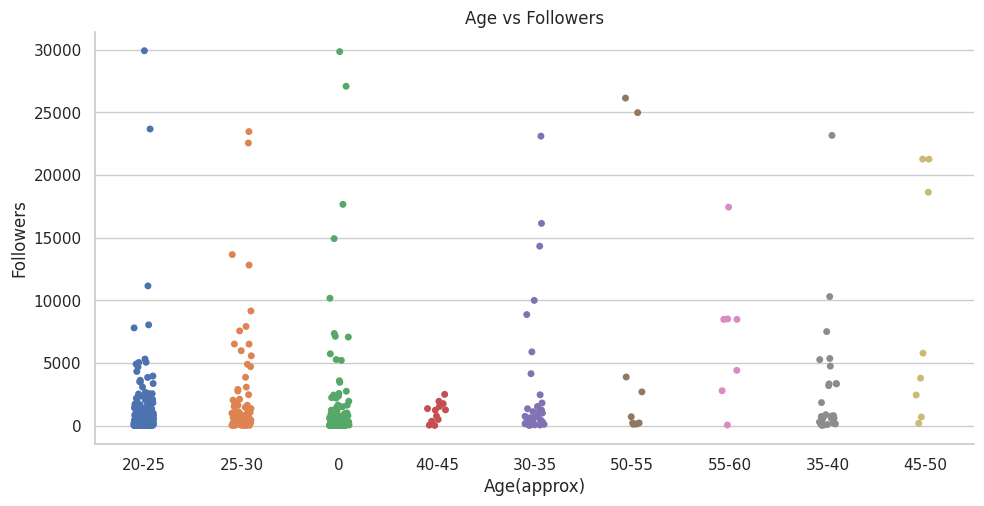

In [66]:
sns.catplot(x = 'Age(approx)', y='Followers', data=df, hue='Age(approx)', aspect=2, kind='strip').set(title="Age vs Followers")


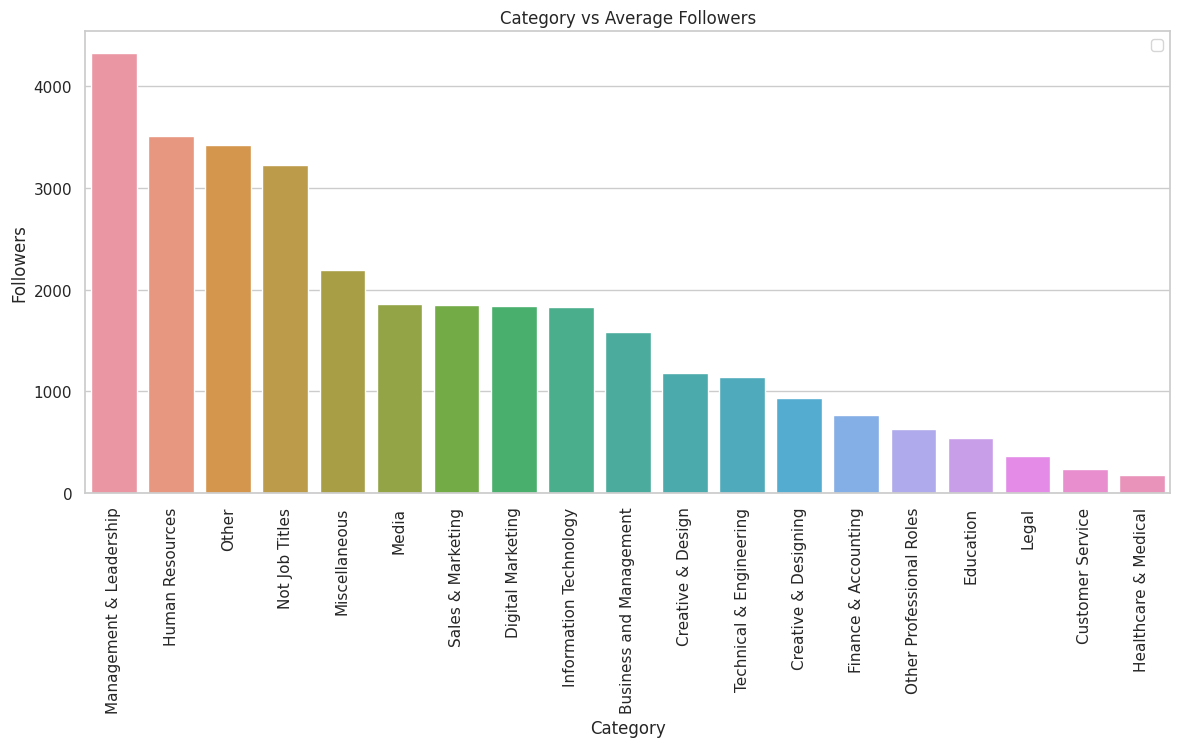

In [83]:
# Group the data by 'Category' and calculate the average number of followers in each category
average_followers_by_category = df.groupby('Category')['Followers'].mean().reset_index()
# Sort the grouped DataFrame by the 'count' column in descending order
average_followers_by_category = average_followers_by_category.sort_values(by='Followers', ascending=False)

# Create the bar plot with increased bar thickness
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.barplot(x='Category', y='Followers', data=average_followers_by_category, hue='Category', dodge=False)
plt.title("Category vs Average Followers")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Remove the legend
plt.legend([])

# Show the plot
plt.show()